In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import datetime as dt
import math

In [3]:

# Zadanie: przestępczość

  #1  Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.
  
 #2  Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy 
 #(‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).


  #3 Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji 
  #   wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym 
  #    odsetkiem znamion choroby psychicznej podczas interwencji.
  
  #4  Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia 
  # tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.
  
    #5  Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów
    #  poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej 
    # śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.


In [4]:
df = pd.read_csv('fatal-police-shootings-data.csv')

In [5]:
df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
 #2  Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy 
 #(‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’)

In [7]:
df2 = df[['race','signs_of_mental_illness']] 

In [8]:
df2

,race,signs_of_mental_illness
0,A,True
1,W,False
2,H,False
3,W,True
4,H,False
...,...,...
5411,W,False
5412,NaN,False
5413,W,False
5414,NaN,False


In [9]:
df3 = df2.groupby('race').sum() 

In [10]:
df3

,signs_of_mental_illness
race,
A,24
B,184
H,157
N,14
O,11
W,713


In [11]:
total_cases = df3.signs_of_mental_illness.sum()

In [12]:
total_cases

1103

In [13]:
  #3 Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji 
  #   wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym 
  #    odsetkiem znamion choroby psychicznej podczas interwencji.

In [14]:
df3["odsetek_crimeillness_per_race"] = df3.apply(lambda x: [x.signs_of_mental_illness/total_cases * 100], axis = 1)

In [15]:
df3

,signs_of_mental_illness,odsetek_crimeillness_per_race
race,,
A,24,[2.175883952855848]
B,184,[16.68177697189483]
H,157,[14.233907524932004]
N,14,[1.2692656391659112]
O,11,[0.9972801450589301]
W,713,[64.64188576609247]


In [16]:
#4  Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia 
  # tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [17]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dt.day_name()




0         Friday
1         Friday
2       Saturday
3         Sunday
4         Sunday
          ...   
5411    Saturday
5412    Saturday
5413      Monday
5414     Tuesday
5415     Tuesday
Name: date, Length: 5416, dtype: object

In [18]:
p =df[df['date'].dt.day_name()=='Monday']
w =df[df['date'].dt.day_name()=='Tuesday']
s =df[df['date'].dt.day_name()=='Wednesday']
c =df[df['date'].dt.day_name()=='Thursday']
pt =df[df['date'].dt.day_name()=='Friday']
s = df[df['date'].dt.day_name()=='Saterday']
n = df[df['date'].dt.day_name()=='Sunday']
dni = pd.DataFrame(df)
dni["Dzień tygodnia"] = df['date'].dt.day_name()



In [19]:
df7 = dni.groupby(dni["Dzień tygodnia"]).count()
df8 =df7[['id']]  

In [20]:
df8

,id
Dzień tygodnia,
Friday,761
Monday,726
Saturday,721
Sunday,753
Thursday,810
Tuesday,816
Wednesday,829


In [21]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_weekday = df8.groupby(['Dzień tygodnia']).sum().reindex(cats)

In [22]:
df_weekday

,id
Dzień tygodnia,
Monday,726
Tuesday,816
Wednesday,829
Thursday,810
Friday,761
Saturday,721
Sunday,753


In [23]:
pie_data = df_weekday['id']
labels = cats

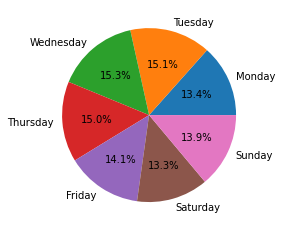

In [24]:
plt.pie(pie_data,labels=labels,autopct='%1.1f%%')
plt.show()

In [25]:
# wtorek, środa, czwatek najwiecej morderstw

In [26]:
# Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów 
# poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej 
# śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [27]:
data1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)

In [28]:
data2 = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)

In [29]:
df20 = data1[0]

In [30]:
df20.head (3)

,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).1","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).4","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO a

In [31]:
df21 = data2[0]

In [32]:
df21

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]"
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%
2,3.0,4.0,Florida,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%
3,4.0,3.0,New York,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%
4,5.0,6.0,Pennsylvania,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%
5,6.0,5.0,Illinois,12671821,12830632,-1.2%,"−158,811",18,633591,703990,712864,3.85%
6,7.0,7.0,Ohio,11689100,11536504,1.3%,+152596,16,649394,730569,721032,3.53%
7,8.0,9.0,Georgia,10617423,9687653,9.6%,+929770,14,663589,758387,691975,3.18%
8,9.0,10.0,North Carolina,10488084,9535483,10.0%,+952601,13,699206,806776,733498,3.14%
9,10.0,8.0,Michigan,9986857,9883640,1.0%,+103217,14,624179,713347,705974,3.02%


In [33]:
df20.columns = ['1', '2', '3', 'kod', '5', '6', '7', '8', '9', '10']

In [34]:
df20.head(30)

,1,2,3,kod,5,6,7,8,9,10
0,Codes:,Codes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ISO,"ISO 3166 codes (2-letter, 3-letter, and 3-digi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANSI,2-letter and 2-digit codes from the ANSI stand...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USPS,2-letter codes used by the United States Posta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USCG,2-letter codes used by the United States Coast...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Abbreviations:,Abbreviations:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,GPO,Older variable-length official US Government P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AP,Abbreviations from the AP Stylebook (bold red ...,Abbreviations from the AP Stylebook (bold red ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Name and status of region,Name and status of region,ISO,ANSI,ANSI,USPS,USCG,GPO,AP,Otherabbreviations
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPO,AP,Otherabbreviations


In [35]:
df21['State'] = df21['State'].astype(str)

In [36]:
dfg = pd.merge(df21, df20, left_on='State', right_on='1')

In [37]:
merged_inner = pd.merge(left=df21, right=df20, left_on='State', right_on='1')

In [38]:
df17 = merged_inner

In [39]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Dzień tygodnia
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [40]:
df23 = df.groupby(df["state"]).count()

In [41]:
df23

,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,Dzień tygodnia
state,,,,,,,,,,,,,,
AK,39,39,39,39,39,38,39,36,39,39,39,36,39,39
AL,104,104,104,104,98,99,104,95,104,104,104,102,104,104
AR,83,83,83,83,80,79,83,73,83,83,83,77,83,83
AZ,254,254,254,254,241,244,254,222,254,254,254,244,254,254
CA,799,799,799,799,766,738,799,701,799,799,799,761,799,799
CO,195,195,195,195,187,181,195,168,195,195,195,186,195,195
CT,21,21,21,21,19,21,21,20,21,21,21,20,21,21
DC,13,13,13,13,13,13,13,13,13,13,13,13,13,13
DE,13,13,13,13,11,13,13,10,13,13,13,13,13,13


In [42]:
df24 =df23[['name']]  

In [43]:
df24

,name
state,
AK,39
AL,104
AR,83
AZ,254
CA,799
CO,195
CT,21
DC,13
DE,13


In [44]:
df17

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019",...,1,2,3,kod,5,6,7,8,9,10
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,...,California,State,US-CA,CA,06,CA,CF,Calif.,Calif.,Cal.
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,...,Texas,State,US-TX,TX,48,TX,TX,Tex.,Texas,NaN
2,3.0,4.0,Florida,21477737,18801310,14.2%,+2676427,27,740611,795472,...,Florida,State,US-FL,FL,12,FL,FL,Fla.,Fla.,NaN
3,4.0,3.0,New York,19453561,19378102,0.4%,+75459,27,670812,720502,...,New York,State,US-NY,NY,36,NY,NY,N.Y.,N.Y.,N. York[2]
4,5.0,6.0,Pennsylvania,12801989,12702379,0.8%,+99610,18,640099,711222,...,Pennsylvania,State,US-PA,PA,42,PA,PA,Pa.,Pa.,"Penn.,[1] Penna.[4]"
5,6.0,5.0,Illinois,12671821,12830632,-1.2%,"−158,811",18,633591,703990,...,Illinois,State,US-IL,IL,17,IL,IL,Ill.,Ill.,"Ills., Ill's"
6,7.0,7.0,Ohio,11689100,11536504,1.3%,+152596,16,649394,730569,...,Ohio,State,US-OH,OH,39,OH,OH,Ohio,Ohio,"O.,[3] Oh.[1]"
7,8.0,9.0,Georgia,10617423,9687653,9.6%,+929770,14,663589,758387,...,Georgia,State,US-GA,GA,13,GA,GA,Ga.,Ga.,Geo.[1]
8,9.0,10.0,North Carolina,10488084,9535483,10.0%,+952601,13,699206,806776,...,North Carolina,State,US-NC,NC,37,NC,NC,N.C.,N.C.,N. Car.
9,10.0,8.0,Michigan,9986857,9883640,1.0%,+103217,14,624179,713347,...,Michigan,State,US-MI,MI,26,MI,MC,Mich.,Mich.,NaN


In [45]:
df18 = df17 [['kod','State', 'Population estimate, July 1, 2019[2]']] 

In [46]:
df18

,kod,State,"Population estimate, July 1, 2019[2]"
0,CA,California,39512223
1,TX,Texas,28995881
2,FL,Florida,21477737
3,NY,New York,19453561
4,PA,Pennsylvania,12801989
5,IL,Illinois,12671821
6,OH,Ohio,11689100
7,GA,Georgia,10617423
8,NC,North Carolina,10488084
9,MI,Michigan,9986857


In [47]:
df24

,name
state,
AK,39
AL,104
AR,83
AZ,254
CA,799
CO,195
CT,21
DC,13
DE,13


In [48]:
df18['kod'] = df18['kod'].astype(str)


C:\Users\may\AppData\Local\Temp/ipykernel_10780/1896529923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['kod'] = df18['kod'].astype(str)


In [49]:
merged_inner = pd.merge(left=df18, right=df24, left_on='kod', right_on='state')

In [50]:
df25 = merged_inner

In [51]:
df25

,kod,State,"Population estimate, July 1, 2019[2]",name
0,CA,California,39512223,799
1,TX,Texas,28995881,481
2,FL,Florida,21477737,350
3,NY,New York,19453561,101
4,PA,Pennsylvania,12801989,108
5,IL,Illinois,12671821,104
6,OH,Ohio,11689100,155
7,GA,Georgia,10617423,182
8,NC,North Carolina,10488084,156
9,MI,Michigan,9986857,78


In [52]:
df26 = df25.rename(columns={'Population estimate, July 1, 2019[2]':'Populacja','name':'no_of_cases'})

In [53]:
df26

,kod,State,Populacja,no_of_cases
0,CA,California,39512223,799
1,TX,Texas,28995881,481
2,FL,Florida,21477737,350
3,NY,New York,19453561,101
4,PA,Pennsylvania,12801989,108
5,IL,Illinois,12671821,104
6,OH,Ohio,11689100,155
7,GA,Georgia,10617423,182
8,NC,North Carolina,10488084,156
9,MI,Michigan,9986857,78


In [54]:
# prop:     populacja  = 1000
#       ile przypadków = x (ilość przypadków na 1000 m danego stanu)

# x * populacja = ile przupadków * 1000
# x = (ile przypadków * 1000)/ populacja
#  percent x *100

In [55]:
df33 = df26['no_of_cases']*1000 /df26['Populacja'] *100

In [56]:
df26["odsetek przypadków na 1000 mieszkańców"] = df26.apply(lambda x: x.no_of_cases*1000/x.Populacja * 100, axis = 1)

In [57]:
df26

,kod,State,Populacja,no_of_cases,odsetek przypadków na 1000 mieszkańców
0,CA,California,39512223,799,2.022159
1,TX,Texas,28995881,481,1.658856
2,FL,Florida,21477737,350,1.629594
3,NY,New York,19453561,101,0.519185
4,PA,Pennsylvania,12801989,108,0.843619
5,IL,Illinois,12671821,104,0.820719
6,OH,Ohio,11689100,155,1.326022
7,GA,Georgia,10617423,182,1.714164
8,NC,North Carolina,10488084,156,1.487402
9,MI,Michigan,9986857,78,0.781027
